nodes visited   4534800000
cache space     30000034
nodes stored    30000034
nodes forgotten 2961772410
current depth   9
current node    87 63 11 44 33 01 13 50 62
role: min
  root: work: 978415724 pn0:  12076 pn1:   6116 dn0:  26247 dn1:  26624 

role: max
(6, 6): work: 132829680 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(7, 6): work: 209717841 pn0:   2117 pn1:   1464 dn0:  26772 dn1:  27437 
(7, 7): work:  80967249 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(8, 8): work:   2502911 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(8, 7): work: 250884592 pn0:   9959 pn1:   4652 dn0:  26247 dn1:  26624 
(8, 6): work: 301513450 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 

expanding move (8, 7)
role: min
(7, 3): work:  76698117 pn0:  11272 pn1:   7499 dn0:   6160 dn1:   6307 
(8, 3): work:  50730862 pn0:  11274 pn1:   5393 dn0:   1947 dn1:   2589 
(7, 4): work:  13007470 pn0:    INF pn1:   4652 dn0:      0 dn1:    309 
(6, 3): work:  56334731 pn0:  11120 pn1:   8461 dn0

KeyboardInterrupt: 

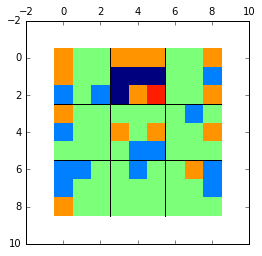

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()

sols = {}
with open('Stephen.txt','a') as file_:
    file_.write('\n' + '*'*30 + '\nStarting a new run\n' + '*'*30 + '\n'*2)
for move in game.legal_moves()[2:3]:
    with open('Stephen.txt','a') as file_:
        file_.write('*'*30 + '\nmove ' + str(move) + '\n' + '*'*30 + '\n')
# for move in [(3,1)]:
    game.update_move(move)
#     game.update_move((3,0))
    for move2 in game.legal_moves():
#     for move2 in [(0,5)]:
        dfpn.init()
        game.update_move(move2)
#         game.update_move((2,2))
        node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
        if node[2] == 0:
            node_print = 'Stephen wins'
        elif node[5] == 0:
            node_print = "Todd wins"
        elif node[3]==node[4]==0:
            node_print = 'tie'
        sols[(move,move2)]=node_print
        with open('Stephen.txt','a') as file_:
            file_.write('moves {}{} - {}\n'.format(move,move2,node_print))
        for _ in xrange(len(game.log) - log_len-1):
            game.erase_move()

    game.erase_move()
    assert(len(game.log) == log_len)
print 'time',time.clock() - t0

print sols
# print tree